#### !pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# DATA PREP

### 1. Uploading the data

In [44]:
df1=pd.read_csv(r"C:\Users\ophir\OneDrive\Desktop\BIU\Class 1\income_1.csv",index_col=0)
df2=pd.read_csv(r"C:\Users\ophir\OneDrive\Desktop\BIU\Class 1\income_2.csv",index_col=0)

### 2. Merging tables 
Inner Join                                                                                                                        
This type of merge returns only the rows where there is a match between the two dataframes.<br>                                      
Outer Join      <br>                                                                                                              This type of merge returns all rows from both dataframes, and fills in NaN where there are no matches.

In [45]:
# Merge the dataframes on common columns without duplicating columns
merged_df= pd.merge(df1, df2, on=['age', 'workclass', 'fnlwgt'], how='inner')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_income.csv', index=False)

# Display the first few rows of the merged dataframe
merged_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,11,Taiwan,<=50K
36985,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,40,United-States,>50K
36986,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,United-States,<=50K
36987,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,United-States,<=50K


In [46]:
merged_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

### 3. Convert an objects into viable data 
(string, int, float....)

In [47]:
df=merged_df.copy()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36989 entries, 0 to 36988
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36989 non-null  int64 
 1   workclass       36989 non-null  object
 2   fnlwgt          36989 non-null  int64 
 3   education       36989 non-null  object
 4   education.num   36989 non-null  int64 
 5   marital.status  36989 non-null  object
 6   occupation      36989 non-null  object
 7   relationship    36989 non-null  object
 8   race            36989 non-null  object
 9   sex             36989 non-null  object
 10  capital.loss    36989 non-null  int64 
 11  hours.per.week  36989 non-null  int64 
 12  native.country  36989 non-null  object
 13  income          36989 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.0+ MB


In [49]:
df['income']=df['income'].astype('string')

In [50]:
# We can replace df['income'] values to avoid risk of changing the values in other columns
df=df.replace(to_replace="<=50K", value="0") 
df=df.replace(to_replace=">50K", value="1")

### 4. Value counts of 50>

In [51]:
df['income'].value_counts()

income
0    27901
1     9088
Name: count, dtype: Int64

In [52]:
#Values of the categorial feature
df['education'].value_counts()

education
HS-grad         11919
Some-college     8330
Bachelors        6238
Masters          1947
Assoc-voc        1554
11th             1295
Assoc-acdm       1222
10th             1019
7th-8th           700
Prof-school       620
9th               578
12th              494
Doctorate         463
5th-6th           362
1st-4th           191
Preschool          57
Name: count, dtype: int64

In [53]:
df['education']=df['education'].astype('string')
df['education']=df['education'].str.replace('-','')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36989 entries, 0 to 36988
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36989 non-null  int64 
 1   workclass       36989 non-null  object
 2   fnlwgt          36989 non-null  int64 
 3   education       36989 non-null  string
 4   education.num   36989 non-null  int64 
 5   marital.status  36989 non-null  object
 6   occupation      36989 non-null  object
 7   relationship    36989 non-null  object
 8   race            36989 non-null  object
 9   sex             36989 non-null  object
 10  capital.loss    36989 non-null  int64 
 11  hours.per.week  36989 non-null  int64 
 12  native.country  36989 non-null  object
 13  income          36989 non-null  string
dtypes: int64(5), object(7), string(2)
memory usage: 4.0+ MB


### 5. Clean Text - remove punctuation

In [55]:
#!pip install string
import string

In [56]:
# Columns to convert
columns_to_convert = ['workclass', 'education', 'relationship', 'sex', 'race','occupation','native.country']

# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype('string')

In [57]:
# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype(str)

# Remove punctuation in one line
string_df = string_df.applymap(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Assign the cleaned columns back to the original DataFrame
df[columns_to_convert] = string_df

# Display the resulting DataFrame
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,,77053,HSgrad,9,Widowed,,Notinfamily,White,Female,4356,40,UnitedStates,0
1,82,Private,132870,HSgrad,9,Widowed,Execmanagerial,Notinfamily,White,Female,4356,18,UnitedStates,0
2,66,,186061,Somecollege,10,Widowed,,Unmarried,Black,Female,4356,40,UnitedStates,0
3,54,Private,140359,7th8th,4,Divorced,Machineopinspct,Unmarried,White,Female,3900,40,UnitedStates,0
4,41,Private,264663,Somecollege,10,Separated,Profspecialty,Ownchild,White,Female,3900,40,UnitedStates,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,32,Private,116138,Masters,14,Never-married,Techsupport,Notinfamily,AsianPacIslander,Male,0,11,Taiwan,0
36985,53,Private,321865,Masters,14,Married-civ-spouse,Execmanagerial,Husband,White,Male,0,40,UnitedStates,1
36986,27,Private,257302,Assocacdm,12,Married-civ-spouse,Techsupport,Wife,White,Female,0,38,UnitedStates,0
36987,58,Private,151910,HSgrad,9,Widowed,Admclerical,Unmarried,White,Female,0,40,UnitedStates,0


exploring features

In [58]:
df['race'].value_counts() 
#df['workclass'].value_counts() 
#df['relationship'].value_counts()

race
White               32008
Black                3289
AsianPacIslander     1093
AmerIndianEskimo      322
Other                 277
Name: count, dtype: int64

### 6. Narrowing Categories

Exploriring the 'native.country' category

In [59]:
df['native.country'].value_counts()

native.country
UnitedStates             33174
Mexico                     733
                           661
Philippines                214
Germany                    161
Canada                     131
ElSalvador                 126
PuertoRico                 119
England                    106
India                      105
Cuba                        97
Jamaica                     94
Italy                       89
Poland                      84
South                       82
China                       80
Guatemala                   78
DominicanRepublic           73
Vietnam                     72
Japan                       63
Columbia                    62
Iran                        54
Taiwan                      54
Portugal                    48
Haiti                       45
Nicaragua                   36
Greece                      35
Peru                        34
France                      34
Ireland                     34
Ecuador                     32
TrinadadTobago          

In [60]:
#North America
df['native.country'] = df['native.country'].replace({'UnitedStates': "North America",
                                                     'Mexico': "North America",
                                                     'Canada': "North America",                                                
                                                     'Puerto Rico': "North America",
                                                     'Cuba': "North America",
                                                     'Jamaica': "North America",
                                                     'DominicanRepublic':"North America",                                                             
                                                     'Nicaragua':"North America",
                                                     'Honduras':"North America",
                                                     'OutlyingUSGuamUSVIet':"North America",
                                                     'PuertoRico':"North America"
                                                    })                                                    

In [61]:
#South America
df['native.country'] = df['native.country'].replace({                                                     
                                                     'Columbia':"Central and South America",
                                                     'Peru':"Central and South America",
                                                     'Ecuador':"Central and South America",
                                                     'Guatemala':"Central and South America",           
                                                     'Nicaragua':"Central and South America",
                                                     'ElSalvador': "Central and South America",
                                                     'Haiti': "Central and South America",
                                                     'Central America': "Central and South America",
                                                     'TrinadadTobago':"Central and South America"})


In [62]:
# Create a dictionary for replacement (map)
replacement_dict = {'England': 'UK', 'Scotland': 'UK', 'Ireland': 'UK'}

# Use the map function to replace values in 'native.country' based on the dictionary
# The fillna function ensures that any values not in the dictionary remain unchanged
df['native.country'] = df['native.country'].map(replacement_dict).fillna(df['native.country'])


In [63]:
#Europe
df['native.country'] = df['native.country'].replace({'Italy': "Europe",
                                                     'Poland': "Europe",
                                                     'Germany': "Europe",
                                                     'Portugal': "Europe",
                                                     'Hungary': "Europe",
                                                     'Greece': "Europe",
                                                     'Yugoslavia': "Europe",                                                    
                                                     'France': "Europe",              
                                                     'HolandNetherlands': "Europe"})

In [64]:
#Asia
df['native.country'] = df['native.country'].replace({'Philippines': "Asia",
                                                     'India': "Asia",  'China': "Asia",
                                                     'Philippines': "Asia",
                                                     'China': "Asia",        
                                                     'Japan': "Asia",
                                                     'Taiwan': "Asia",                                                     
                                                     'Iran': "Asia",                                                
                                                     'Hong': "Asia",           
                                                     'Laos': "Asia",
                                                     'South': "Asia",
                                                     'Vietnam': "Asia",
                                                     'Cambodia': "Asia",
                                                     'Thailand': "Asia"})   

In [65]:
df['native.country'].value_counts()

native.country
North America                34470
Asia                           802
                               661
Europe                         486
Central and South America      401
UK                             153
OutlyingUSGuamUSVIetc           16
Name: count, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36989 entries, 0 to 36988
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36989 non-null  int64 
 1   workclass       36989 non-null  object
 2   fnlwgt          36989 non-null  int64 
 3   education       36989 non-null  object
 4   education.num   36989 non-null  int64 
 5   marital.status  36989 non-null  object
 6   occupation      36989 non-null  object
 7   relationship    36989 non-null  object
 8   race            36989 non-null  object
 9   sex             36989 non-null  object
 10  capital.loss    36989 non-null  int64 
 11  hours.per.week  36989 non-null  int64 
 12  native.country  36989 non-null  object
 13  income          36989 non-null  string
dtypes: int64(5), object(8), string(1)
memory usage: 4.0+ MB


In [67]:
df['income'].value_counts()

income
0    27901
1     9088
Name: count, dtype: Int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36989 entries, 0 to 36988
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36989 non-null  int64 
 1   workclass       36989 non-null  object
 2   fnlwgt          36989 non-null  int64 
 3   education       36989 non-null  object
 4   education.num   36989 non-null  int64 
 5   marital.status  36989 non-null  object
 6   occupation      36989 non-null  object
 7   relationship    36989 non-null  object
 8   race            36989 non-null  object
 9   sex             36989 non-null  object
 10  capital.loss    36989 non-null  int64 
 11  hours.per.week  36989 non-null  int64 
 12  native.country  36989 non-null  object
 13  income          36989 non-null  string
dtypes: int64(5), object(8), string(1)
memory usage: 4.0+ MB


Changing values

In [69]:
df=df.replace(to_replace="Female", value='1') 
df=df.replace(to_replace="Male", value='0')

In [70]:
df['sex']=df['sex'].astype(int)

In [71]:
df['sex'].value_counts()

sex
0    25252
1    11737
Name: count, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36989 entries, 0 to 36988
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36989 non-null  int64 
 1   workclass       36989 non-null  object
 2   fnlwgt          36989 non-null  int64 
 3   education       36989 non-null  object
 4   education.num   36989 non-null  int64 
 5   marital.status  36989 non-null  object
 6   occupation      36989 non-null  object
 7   relationship    36989 non-null  object
 8   race            36989 non-null  object
 9   sex             36989 non-null  int32 
 10  capital.loss    36989 non-null  int64 
 11  hours.per.week  36989 non-null  int64 
 12  native.country  36989 non-null  object
 13  income          36989 non-null  string
dtypes: int32(1), int64(5), object(7), string(1)
memory usage: 3.8+ MB


In [73]:
df['age'].value_counts()#reduce

age
31    1058
28    1057
23    1053
33    1037
36    1036
      ... 
83       6
88       3
85       3
86       1
87       1
Name: count, Length: 73, dtype: int64

#### Task

1-Create age groups <br> 2- Crate a countplot for the groups

### Age Groups

In [74]:
# Categorize the ages into bins with labels
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 24, 34, 44, 69, float('inf')], labels=['<18', '18-24', '25-34', '35-44', '45-69', '>70'], right=False)

In [75]:
# Aggregate the age groups
age_group_aggregation = df.groupby('age_range').size().reset_index(name='count')

age_group_aggregation


,age_range,count
0,<18,417
1,18-24,5091
2,25-34,9957
3,35-44,9477
4,45-69,11286
5,>70,761


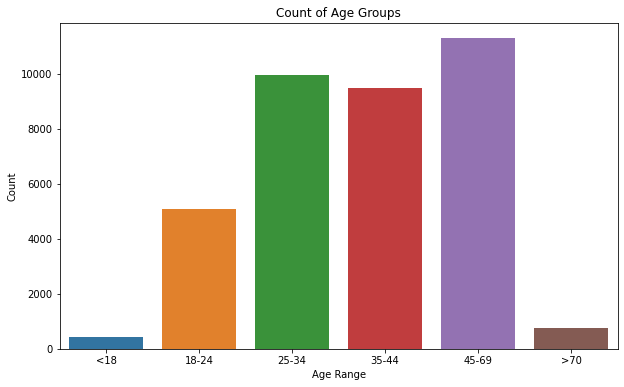

In [76]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=df, order=['<18', '18-24', '25-34', '35-44', '45-69', '>70'])
plt.title('Count of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [77]:
df['sex'].value_counts()

sex
0    25252
1    11737
Name: count, dtype: int64

In [78]:
df_dummy=df['income']

<Axes: xlabel='income', ylabel='count'>

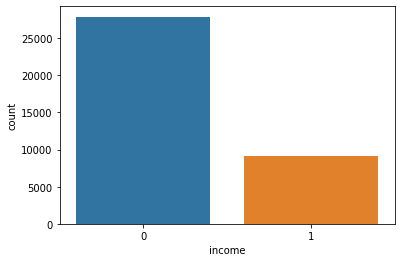

In [79]:
sns.countplot(df_dummy)

Saving Manipulated data

In [80]:
df.to_csv('final_income_copy')

Another option is Pickle file

# Pickle file

A pickle file in Python is used to serialize and deserialize Python objects. <br>Serialization (write binary) is the process of converting a Python object into a byte stream, which can then be written to a file or transmitted over a network. <br>Deserialization (read binary) is the reverse process, converting the byte stream back into a Python object.

In [81]:
df.to_pickle('mrg_df_after_data_prep_5.2.25.pkl')
df=pd.read_pickle('mrg_df_after_data_prep_5.2.25.pkl')

In [82]:
import pickle
#Write a pickle file
with open('income.pkl', 'wb') as f:
    pickle.dump(df, f)

print("income dataset saved as a pickle file.")

income dataset saved as a pickle file.


In [83]:
#Read a pickle file and load the data
with open('income.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [84]:
loaded_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income,age_range
0,90,,77053,HSgrad,9,Widowed,,Notinfamily,White,1,4356,40,North America,0,>70
1,82,Private,132870,HSgrad,9,Widowed,Execmanagerial,Notinfamily,White,1,4356,18,North America,0,>70
2,66,,186061,Somecollege,10,Widowed,,Unmarried,Black,1,4356,40,North America,0,45-69
3,54,Private,140359,7th8th,4,Divorced,Machineopinspct,Unmarried,White,1,3900,40,North America,0,45-69
4,41,Private,264663,Somecollege,10,Separated,Profspecialty,Ownchild,White,1,3900,40,North America,0,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,32,Private,116138,Masters,14,Never-married,Techsupport,Notinfamily,AsianPacIslander,0,0,11,Asia,0,25-34
36985,53,Private,321865,Masters,14,Married-civ-spouse,Execmanagerial,Husband,White,0,0,40,North America,1,45-69
36986,27,Private,257302,Assocacdm,12,Married-civ-spouse,Techsupport,Wife,White,1,0,38,North America,0,25-34
36987,58,Private,151910,HSgrad,9,Widowed,Admclerical,Unmarried,White,1,0,40,North America,0,45-69


# We got A flat file, Next to EDA